In [1]:
import pandas as pd
import numpy as np

In [2]:
ds=pd.read_csv(r"Social_network_Ads.csv")
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
ds['Purchased'].unique()

array([0, 1], dtype=int64)

# Classification Problem
### "Purchased" column has ony 2 unique values, so it is Binary Classification problem

In [4]:
ds.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [5]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds['Gender']=le.fit_transform(ds['Gender'])

In [6]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [7]:
ds['Gender'].unique()
# Only two unique values, so need of One Hot Encoding

array([1, 0])

In [8]:
x=ds.iloc[:,1:4].values
y=ds.iloc[:,4].values

In [9]:
x.shape

(400, 3)

In [10]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(320, 3)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [12]:
# Training the model using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [13]:
y_pred=dtc.predict(x_test)

In [21]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [14]:
# Getting the Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[43,  2],
       [ 8, 27]], dtype=int64)

In [16]:
# Getting the roc
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

Text(0.5, 0, 'fpr')

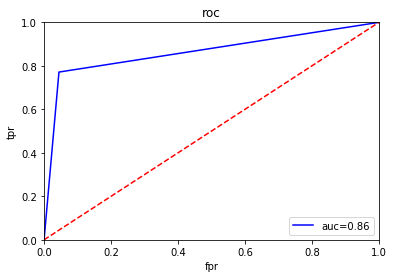

In [17]:
# Plotting the roc-auc curve
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("tpr")
plt.xlabel("fpr")

In [18]:
# Prediction
dtc.predict(sc.fit_transform([[1,34,1900]]))

array([1], dtype=int64)

In [19]:
# Exporting model
import pickle
pickle.dump(dtc,open('DTC.pkl','wb'))

In [20]:
# Import & Predict
model=pickle.load(open('DTC.pkl','rb'))
model.predict(sc.fit_transform([[1,34,1900]]))

array([1], dtype=int64)